In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.noise import AlphaDropout
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
max_words = 1000
batch_size = 16
epochs = 40

### 载入数据集

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [4]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


In [5]:
# Vectorizing sequence data
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [6]:
# Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


### 建模

In [7]:
def create_network(n_dense=6,
                   dense_units=16,
                   activation='selu',
                   dropout=AlphaDropout,
                   dropout_rate=0.1,
                   kernel_initializer='lecun_normal',
                   optimizer='adam',
                   num_classes=1,
                   max_words=max_words):
    """Generic function to create a fully-connected neural network.
    # Arguments
        n_dense: int > 0. Number of dense layers.
        dense_units: int > 0. Number of dense units per layer.
        dropout: keras.layers.Layer. A dropout layer to apply.
        dropout_rate: 0 <= float <= 1. The rate of dropout.
        kernel_initializer: str. The initializer for the weights.
        optimizer: str/keras.optimizers.Optimizer. The optimizer to use.
        num_classes: int > 0. The number of classes to predict.
        max_words: int > 0. The maximum number of words per data point.
    # Returns
        A Keras model instance (compiled).
    """
    model = Sequential()
    model.add(Dense(dense_units, input_shape=(max_words,),
                    kernel_initializer=kernel_initializer))
    model.add(Activation(activation))
    model.add(dropout(dropout_rate))

    for i in range(n_dense - 1):
        model.add(Dense(dense_units, kernel_initializer=kernel_initializer))
        model.add(Activation(activation))
        model.add(dropout(dropout_rate))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [8]:
network1 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'relu',
    'dropout': Dropout,
    'dropout_rate': 0.5,
    'kernel_initializer': 'glorot_uniform',
    'optimizer': 'sgd'
}

network2 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'selu',
    'dropout': Dropout,
    'dropout_rate': 0.1,
    'kernel_initializer': 'lecun_normal',
    'optimizer': 'adam'
}

### 训练模型1

In [9]:
model1 = create_network(num_classes=num_classes, **network1)

In [10]:
history_model1 = model1.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 1s 139us/step - loss: 2.2452 - acc: 0.4693 - val_loss: 1.6036 - val_acc: 0.6073
Epoch 2/40
8083/8083 [==============================] - 1s 83us/step - loss: 1.6952 - acc: 0.5921 - val_loss: 1.4251 - val_acc: 0.6518
Epoch 3/40
8083/8083 [==============================] - 1s 84us/step - loss: 1.5195 - acc: 0.6319 - val_loss: 1.3283 - val_acc: 0.6852
Epoch 4/40
8083/8083 [==============================] - 1s 82us/step - loss: 1.4148 - acc: 0.6602 - val_loss: 1.2950 - val_acc: 0.6897
Epoch 5/40
8083/8083 [==============================] - 1s 84us/step - loss: 1.3579 - acc: 0.6722 - val_loss: 1.2621 - val_acc: 0.6963
Epoch 6/40
8083/8083 [==============================] - 1s 85us/step - loss: 1.2933 - acc: 0.6853 - val_loss: 1.2419 - val_acc: 0.6997
Epoch 7/40
8083/8083 [==============================] - 1s 82us/step - loss: 1.2554 - acc: 0.6916 - val_loss: 1.2320 - val_acc: 0.7097
Epoch 8

In [11]:
score_model1 = model1.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)

2246/2246 [==============================] - 0s 33us/step


### 训练模型2

In [12]:
model2 = create_network(num_classes=num_classes, **network2)

In [13]:
history_model2 = model2.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 1s 155us/step - loss: 1.9184 - acc: 0.5550 - val_loss: 1.4424 - val_acc: 0.6696
Epoch 2/40
8083/8083 [==============================] - 1s 100us/step - loss: 1.4083 - acc: 0.6735 - val_loss: 1.2940 - val_acc: 0.6941
Epoch 3/40
8083/8083 [==============================] - 1s 93us/step - loss: 1.2550 - acc: 0.7049 - val_loss: 1.2566 - val_acc: 0.7019
Epoch 4/40
8083/8083 [==============================] - 1s 92us/step - loss: 1.1609 - acc: 0.7192 - val_loss: 1.2041 - val_acc: 0.7130
Epoch 5/40
8083/8083 [==============================] - 1s 91us/step - loss: 1.0696 - acc: 0.7432 - val_loss: 1.1548 - val_acc: 0.7197
Epoch 6/40
8083/8083 [==============================] - 1s 96us/step - loss: 1.0300 - acc: 0.7481 - val_loss: 1.1697 - val_acc: 0.7286
Epoch 7/40
8083/8083 [==============================] - 1s 88us/step - loss: 0.9833 - acc: 0.7600 - val_loss: 1.1541 - val_acc: 0.7341
Epoch 

In [14]:
score_model2 = model2.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)

2246/2246 [==============================] - 0s 40us/step


### 模型效果对比

In [15]:
print('\nNetwork 1 results')
print('Hyperparameters:', network1)
print('Test score:', score_model1[0])
print('Test accuracy:', score_model1[1])
print()
print('Network 2 results')
print('Hyperparameters:', network2)
print('Test score:', score_model2[0])
print('Test accuracy:', score_model2[1])


Network 1 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'selu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0.2, 'kernel_initializer': 'lecun_normal', 'optimizer': 'adam'}
Test score: 1.2225739153388984
Test accuracy: 0.7252894033837934

Network 2 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'selu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0.1, 'kernel_initializer': 'lecun_normal', 'optimizer': 'adam'}
Test score: 1.2290900802357538
Test accuracy: 0.7493321460373998


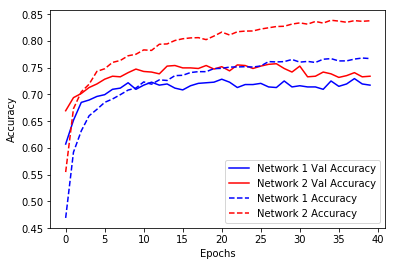

In [16]:
plt.plot(range(epochs),
         history_model1.history['val_acc'],
         'b-',
         label='Network 1 Val Accuracy')
plt.plot(range(epochs),
         history_model2.history['val_acc'],
         'r-',
         label='Network 2 Val Accuracy')
plt.plot(range(epochs),
         history_model1.history['acc'],
         'b--',
         label='Network 1 Accuracy')
plt.plot(range(epochs),
         history_model2.history['acc'],
         'r--',
         label='Network 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

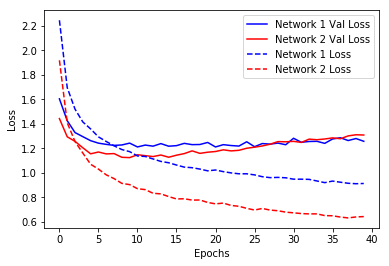

In [17]:
plt.plot(range(epochs),
         history_model1.history['val_loss'],
         'b-',
         label='Network 1 Val Loss')
plt.plot(range(epochs),
         history_model2.history['val_loss'],
         'r-',
         label='Network 2 Val Loss')
plt.plot(range(epochs),
         history_model1.history['loss'],
         'b--',
         label='Network 1 Loss')
plt.plot(range(epochs),
         history_model2.history['loss'],
         'r--',
         label='Network 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()